# Women in Tech

This analysis uses the 2020 survey data from StackOverflow to get a glimpse into where women are in the tech world.
This project is the course project for the [Data Analysis with Python: Zero to Pandas](zerotopandas.com) course.
This project is an extension to "Lesson 6 - Exploratory Data Analysis - A Case Study" of the course.

The course is a hands-on introductory to data analysis using Python programming language along with fundamental but essential library packages for data analysis and visualization.
The dataset contains responses from software development community on Stack Overflow (stackoverflow.com).

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Use the jovian opendatasets library to retrieve the CSV file from stackoverflow.com

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'stackoverflow-developer-survey-2020' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './stackoverflow-developer-survey-2020'

In [5]:
import os
os.listdir(data_dir)

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "women-in-tech"

## Data Preparation and Cleaning

Preparing data for analysis of how women are involved in software technologies

Areas of interest are from the data are:
gender, age, how respondents use software technologies.



In [10]:
import pandas as pd

In [11]:
so_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [12]:
so_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [13]:
so_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [14]:
schema_csv = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
survey_questions = pd.read_csv(schema_csv, index_col='Column').QuestionText
survey_questions

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [15]:
survey_questions['NEWEdImpt']

'How important is a formal education, such as a university degree in computer science, to your career?'

In [16]:
survey_questions['DevType']

'Which of the following describe you? Please select all that apply.'

In [17]:
survey_questions['NEWLearn']

'How frequently do you learn a new language or framework?'

In [18]:
survey_questions['JobSat']

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [19]:
survey_questions['NEWOvertime']

'How often do you work overtime or beyond the formal time expectation of your job?'

In [20]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'NEWLearn',
    # Employment
    'Employment',
    'DevType',
    'JobSat',
    'NEWEdImpt'    
]

In [21]:
#Make a copy of the reduced dataset
survey_df = so_raw_df[selected_columns].copy()
survey_df.shape

(64461, 15)

In [22]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             64072 non-null  object 
 1   Age                 45446 non-null  float64
 2   Gender              50557 non-null  object 
 3   EdLevel             57431 non-null  object 
 4   UndergradMajor      50995 non-null  object 
 5   Hobbyist            64416 non-null  object 
 6   Age1stCode          57900 non-null  object 
 7   YearsCode           57684 non-null  object 
 8   YearsCodePro        46349 non-null  object 
 9   LanguageWorkedWith  57378 non-null  object 
 10  NEWLearn            56156 non-null  object 
 11  Employment          63854 non-null  object 
 12  DevType             49370 non-null  object 
 13  JobSat              45194 non-null  object 
 14  NEWEdImpt           48465 non-null  object 
dtypes: float64(1), object(14)
memory usage: 7.4+ MB


In [23]:
#convert to numeric where making sense
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')
survey_df.head(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,NEWLearn,Employment,DevType,JobSat,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,Once a year,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",Slightly satisfied,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Once a year,Employed full-time,"Developer, full-stack;Developer, mobile",Very dissatisfied,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,Once a year,NaN,NaN,Slightly dissatisfied,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Once a year,Employed full-time,NaN,NaN,Very important


In [24]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro
count,45446.000000,57473.000000,56784.000000,44133.000000
mean,30.834111,15.476572,12.782051,8.869667
std,9.585392,5.114081,9.490657,7.759961
min,1.000000,5.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000
50%,29.000000,15.000000,10.000000,6.000000
75%,35.000000,18.000000,17.000000,12.000000
max,279.000000,85.000000,50.000000,50.000000


In [25]:
# drop rows where age don't make sense
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [26]:
#analyze the Gender data
survey_df.Gender.value_counts()

Man                                                            46007
Woman                                                           3843
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         74
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

## Exploratory Analysis and Visualization

Visualing some attributes of the data may review interesting ideas about women in tech.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [29]:
#boiler plate code to setup plotting for the rest of the cells
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age

In [30]:
survey_df.Gender.value_counts()

Man                                                            46007
Woman                                                           3843
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         74
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

In [31]:
# Get respondent data where Gender contains 'Woman'
import numpy as np

#separate dataframes for men and women
women_df = survey_df.where((survey_df.Gender.str.contains('Woman',na=False)), np.nan, inplace=False)
men_df = survey_df.where((survey_df.Gender.str.contains('Man',na=False)), np.nan, inplace=False)
men_df.where(~(men_df.Gender.str.contains('Woman',na=False)), np.nan, inplace=True)
#survey_df.Gender.value_counts()
men_df.Gender.count()
women_df.Gender.count()

4035

### Women respondent gender by ages

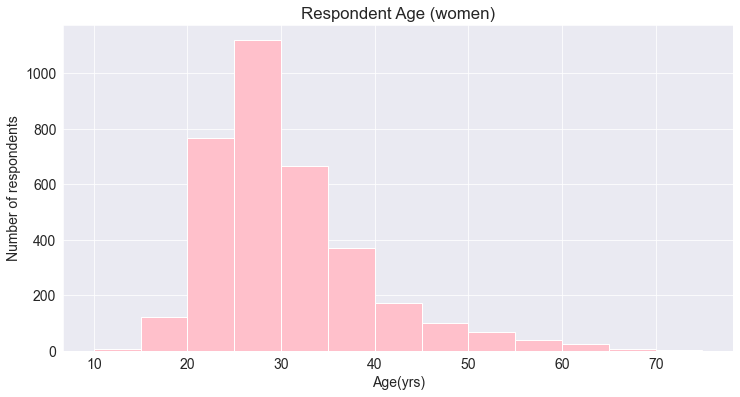

In [32]:
plt.figure(figsize=(12, 6))
plt.title('Respondent Age (women)')
plt.xlabel('Age(yrs)')
plt.ylabel('Number of respondents')
plt.hist(women_df.Age, bins=np.arange(10,80,5), color='pink');

This graph shows the women respondents by age group.

## Age Groups: Women vs. Men

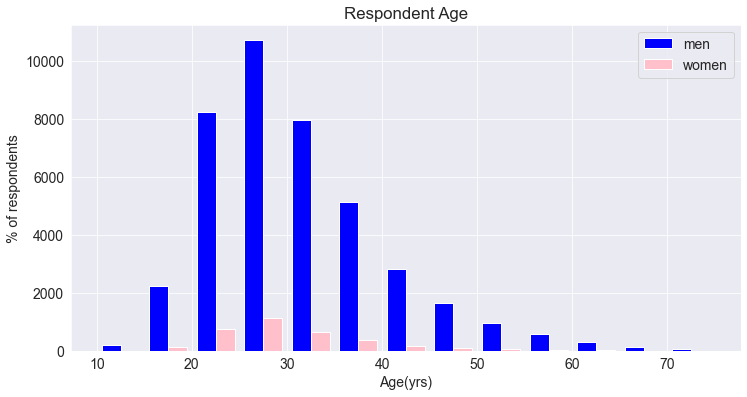

In [33]:
plt.figure(figsize=(12, 6))
plt.title('Respondent Age')
plt.xlabel('Age(yrs)')
plt.ylabel('% of respondents')
plt.hist([men_df.Age, women_df.Age], bins=np.arange(10,80,5), color=['blue','pink'], label=['men','women'])
plt.legend(loc='upper right');

The graph compares gender of respondents by age groups.

## Hobbyist

In [34]:
women_hobbyist_pct = len(women_df[women_df.Hobbyist == 'Yes']) * 100 / women_df.Gender.count()
men_hobbyist_pct = len(men_df[men_df.Hobbyist == 'Yes'])  * 100 / men_df.Gender.count()

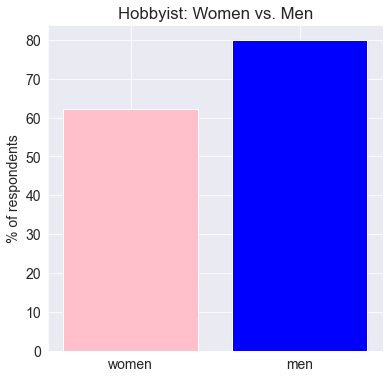

In [35]:
plt.figure(figsize=(6, 6))
plt.title('Hobbyist: Women vs. Men')
plt.ylabel('% of respondents')
plt.bar(['women', 'men'], [women_hobbyist_pct, men_hobbyist_pct], color=['pink', 'blue']);

This graph shows the percentage of programming as a hobby for each gender.

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

Some questions regarding where women are within the software tehnology community need to have answers.

Exploring the data may provide insights for some of the questions regarding gender gaps in the community.


#### Q1: What age do women start programming?

In [38]:
# select data for men and women where starting to code age is less then 18
women_start_age = women_df[women_df.Age1stCode < 18]
men_start_age = men_df[men_df.Age1stCode < 18]

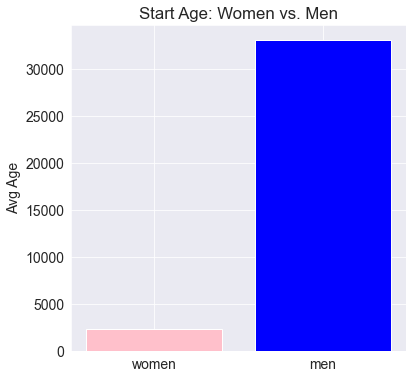

In [39]:
plt.figure(figsize=(6, 6))
plt.title('Start Age: Women vs. Men')
plt.ylabel('Avg Age')
plt.bar(['women', 'men'], [women_start_age.Age1stCode.count(), men_start_age.Age1stCode.count()], color=['pink', 'blue']);

Most women start programming later, after 18 year old.  Also the number of women start programming before 18 year of age is much smaller than the men. This could be the reason for the big gender gap. Perhaps young women should be encouraged to start programming earlier.

#### Q2: What are the gender gaps based on ages?

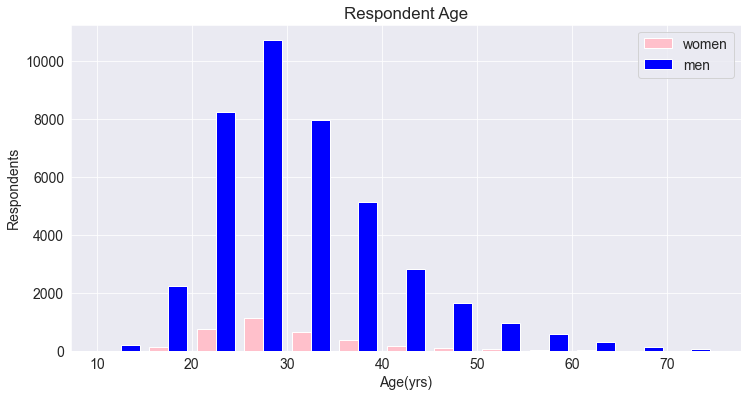

In [40]:
plt.figure(figsize=(12, 6))
plt.title('Respondent Age')
plt.xlabel('Age(yrs)')
plt.ylabel('Respondents')
plt.hist([women_df.Age, men_df.Age], bins=np.arange(10,80,5), color=['pink','blue'], label=['women','men'])
plt.legend(loc='upper right');

The graph shows that the age curves between the genders are similar, but there are noticible differences of when women starting and ending ages.

#### Q3: How are women in coding career compared to men?

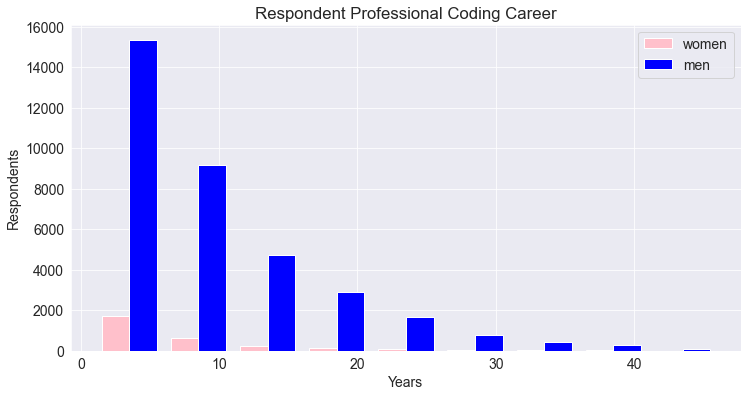

In [41]:
plt.figure(figsize=(12, 6))
plt.title('Respondent Professional Coding Career')
plt.xlabel('Years')
plt.ylabel('Respondents')
plt.hist([women_df.YearsCodePro, men_df.YearsCodePro], bins=np.arange(1,50,5), color=['pink','blue'], label=['women','men'])
plt.legend(loc='upper right');

This graph shows that the two curves has similar shape.  The differences are the number of respondents and the number of years.
This may indicate that the women in tech community is young, and hopefully is growing.

#### Q4: What is the average professional coding career length between the genders?

In [42]:
women_df.YearsCodePro.mean()
men_df.YearsCodePro.mean()

9.181188314810102

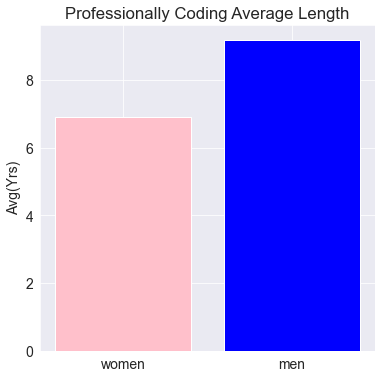

In [43]:
plt.figure(figsize=(6, 6))
plt.title('Professionally Coding Average Length')
plt.ylabel('Avg(Yrs)')
plt.bar(['women', 'men'], [women_df.YearsCodePro.mean(), men_df.YearsCodePro.mean()], color=['pink', 'blue']);

#### Q5:  What are the education levels of women respondents?

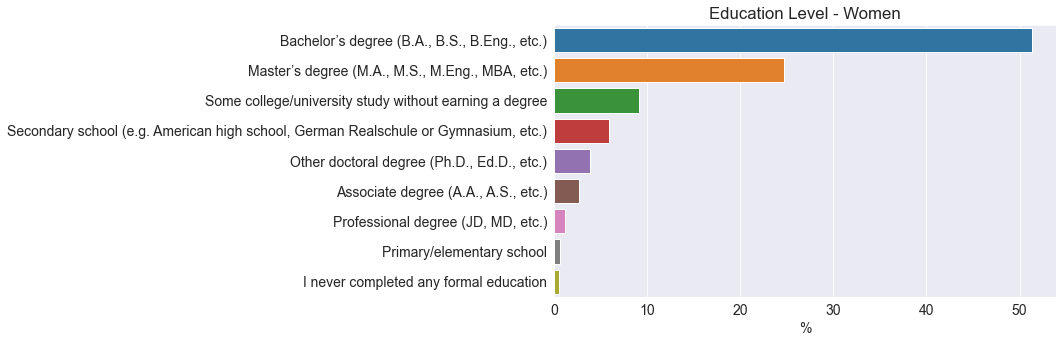

In [44]:
women_ed_pct = women_df.EdLevel.value_counts() * 100 / women_df.EdLevel.count()
sns.barplot(x=women_ed_pct, y=women_ed_pct.index)
plt.title('Education Level - Women')
plt.xlabel('%');
plt.ylabel(None);

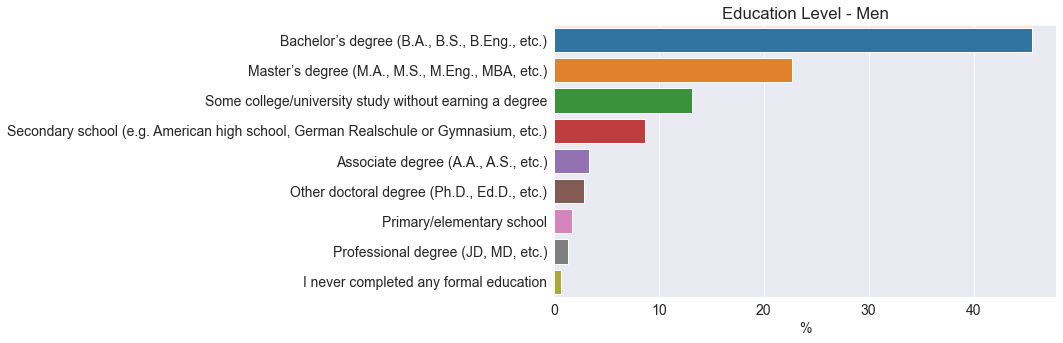

In [45]:
men_ed_pct = men_df.EdLevel.value_counts() * 100 / men_df.EdLevel.count()
sns.barplot(x=men_ed_pct, y=men_ed_pct.index)
plt.title('Education Level - Men')
plt.xlabel('%');
plt.ylabel(None);

The percentage of women with higher education is higher than that of men. This may be an indication that women learn or develop interest in programming from academic environments.

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

Gender gap is very wide in software technology community.
This may be due to women not having exposure to software in the early years.
Women should be inspired, encouraged and introduced to software technologies in early education and childhood activities, especially in under represented countries or areas of the world.  With an abundant of excellent learning resources via the internet, this community can help closing this gender gap. Let's each of us reach out to one young girl or a woman who never code and show her this project, this course, StackOverflow. We can do our part one cell at a time.

## References and Future Work

This dataset from StackOverflow can be a good source to track the progress in gender gap as well as other demographic gaps. Hopefully within 5 to 10 years the gaps will be minimized if not eliminated. Adding to this survey, StackOverflow should add questions to see how respondent get started learning to code.

#### Resources
https://girlswhocode.com/

https://www.youtube.com/watch?v=YQDXpu3t7Og&ab_channel=TEDxTalks

https://www.girlscouts.org/en/about-girl-scouts/girl-scouts-and-stem.html

https://code.org/

https://www.commonsense.org/education/top-picks/steam-games-apps-and-sites

#### References
https://stackoverflow.com/

https://www.kaggle.com/

https://github.com/JovianML/opendatasets

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 